<a href="https://colab.research.google.com/github/lpitts235286/CS-4410/blob/main/image_classification_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Model loaded and ready on cuda


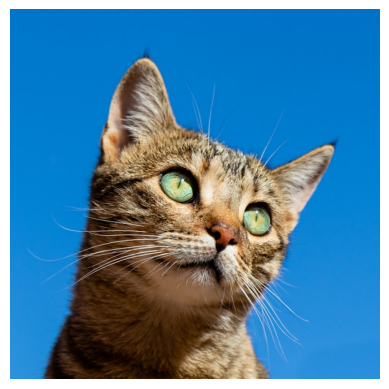

tabby: 68.24%
tiger cat: 17.98%
Egyptian cat: 13.56%
carton: 0.04%
lynx: 0.03%
----------------------------------------


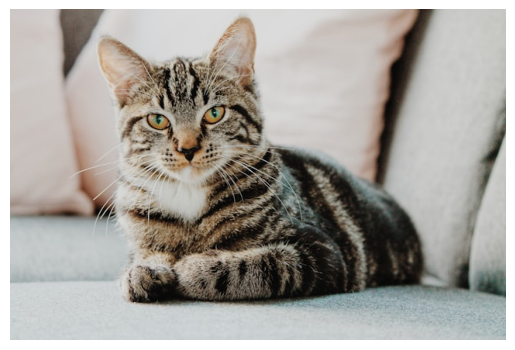

tabby: 53.46%
tiger cat: 39.34%
Egyptian cat: 5.51%
tiger: 0.63%
lynx: 0.24%
----------------------------------------


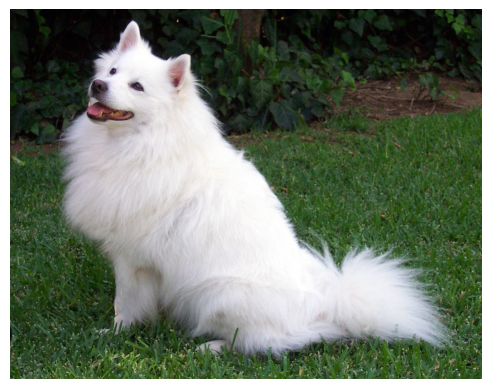

Samoyed: 87.33%
Pomeranian: 3.03%
white wolf: 1.97%
keeshond: 1.11%
Eskimo dog: 0.92%
----------------------------------------


In [1]:
# ===============================
# STEP 1: Install & Import Libraries
# ===============================
!pip install torch torchvision --quiet

import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# ===============================
# STEP 2: Choose and Load Model
# ===============================
# You can choose: resnet18, resnet50, mobilenet_v2
model = models.resnet50(weights="IMAGENET1K_V1")

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()  # put model in inference mode
print("✅ Model loaded and ready on", device)

# ===============================
# STEP 3: Define Image Preprocessing
# ===============================
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load ImageNet class labels
LABELS_URL = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
imagenet_classes = requests.get(LABELS_URL).text.splitlines()

# ===============================
# STEP 4: Define Prediction Function
# ===============================
def predict_image(url):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).convert("RGB")
    except:
        print(f"❌ Could not open image: {url}")
        return

    # Preprocess and run through model
    input_tensor = preprocess(img).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(input_tensor)
        probs = torch.nn.functional.softmax(outputs[0], dim=0)
        top5_prob, top5_catid = torch.topk(probs, 5)

    # Show image
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    # Show top-5 predictions
    for i in range(top5_prob.size(0)):
        print(f"{imagenet_classes[top5_catid[i]]}: {top5_prob[i].item()*100:.2f}%")
    print("-"*40)

# ===============================
# STEP 5: Provide at least 3 Images
# ===============================
image_urls = [
    "https://images.unsplash.com/photo-1574158622682-e40e69881006?w=640",  # Cat
    "https://images.unsplash.com/photo-1518791841217-8f162f1e1131?w=640",  # Cat
    "https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg",   # Dog (working)
]

# ===============================
# STEP 6: Run Predictions
# ===============================
for url in image_urls:
    predict_image(url)
